In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# set plt style
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [540]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [541]:
# Create TransactionID which is a combination of Member_number and Date
df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['TransactionID'] = df['Member_number'].astype(str) + '-' + df['Date']

In [542]:
df.head()

,Member_number,Date,itemDescription,TransactionID
0,1808,2015-07-21,tropical fruit,1808-2015-07-21
1,2552,2015-01-05,whole milk,2552-2015-01-05
2,2300,2015-09-19,pip fruit,2300-2015-09-19
3,1187,2015-12-12,other vegetables,1187-2015-12-12
4,3037,2015-02-01,whole milk,3037-2015-02-01


In [543]:
print(f"The dataset covers {df['Date'].min()} to {df['Date'].max()}")
print(f"There are unique {df['Member_number'].nunique()} customers in the dataset")
print(f"There are unique {df['itemDescription'].nunique()} items in the dataset")
print(f"There are unique {df['TransactionID'].nunique()} transactions in the dataset")

The dataset covers 2014-01-01 to 2015-12-30
There are unique 3898 customers in the dataset
There are unique 167 items in the dataset
There are unique 14963 transactions in the dataset


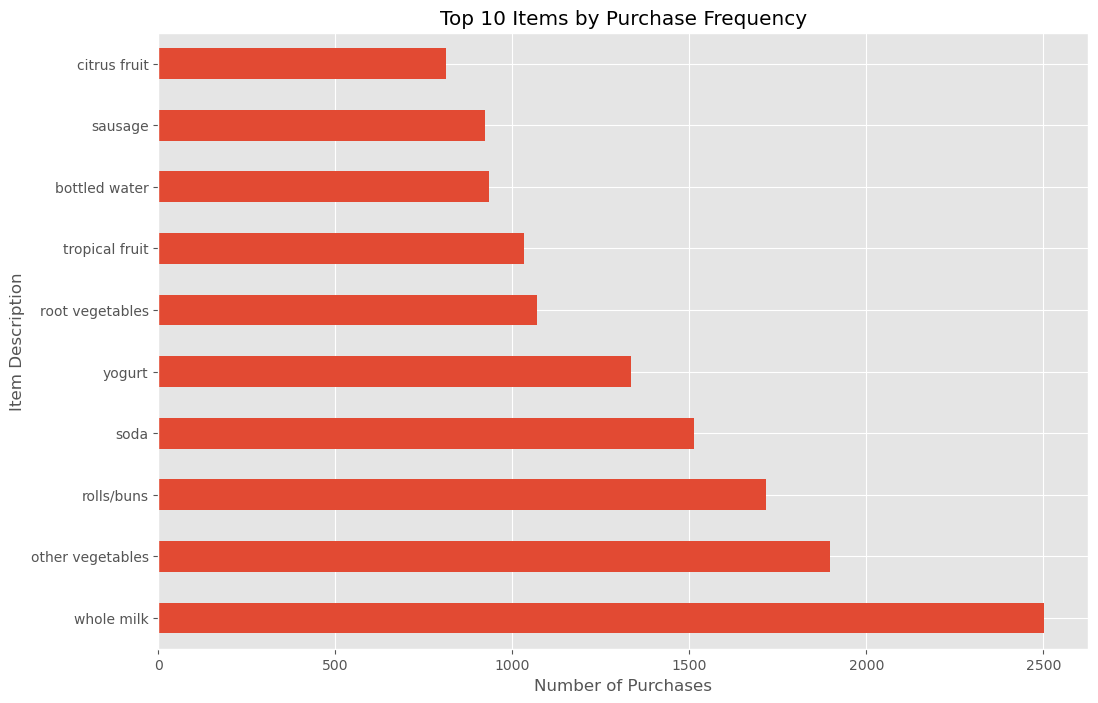

In [544]:
# plot top 25 item descriptions by frequency
plt.figure(figsize=(12,8))
df.itemDescription.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Description')
plt.title('Top 10 Items by Purchase Frequency')
plt.show()


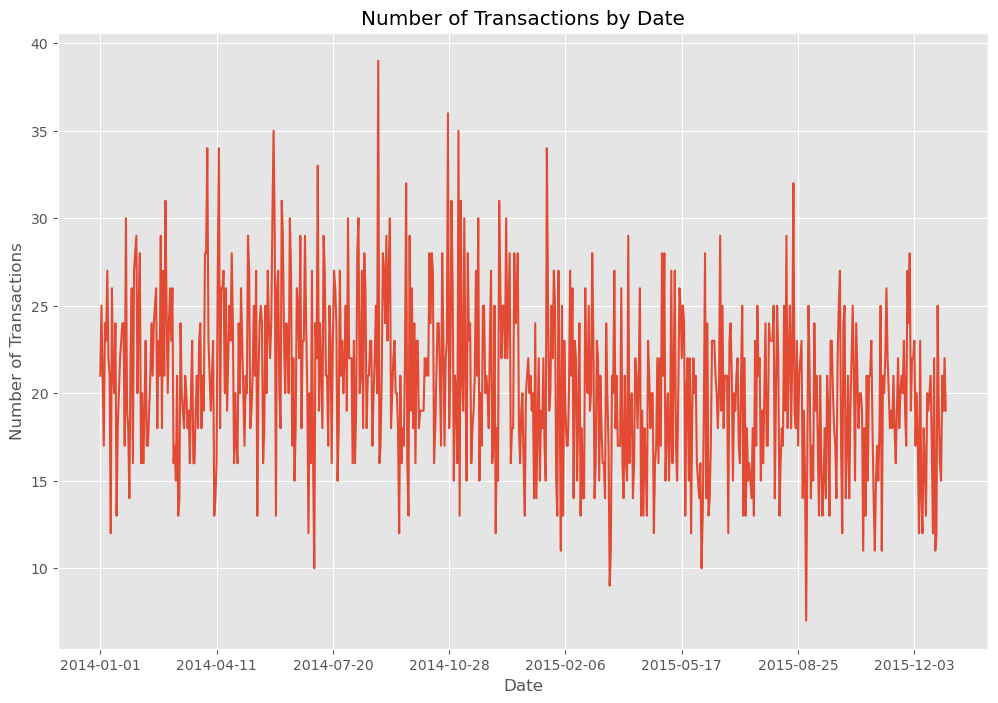

In [545]:
# order the dates and plot the # of transactions by date
plt.figure(figsize=(12,8))
df.groupby('Date')['TransactionID'].nunique().plot()
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Date')
plt.show()

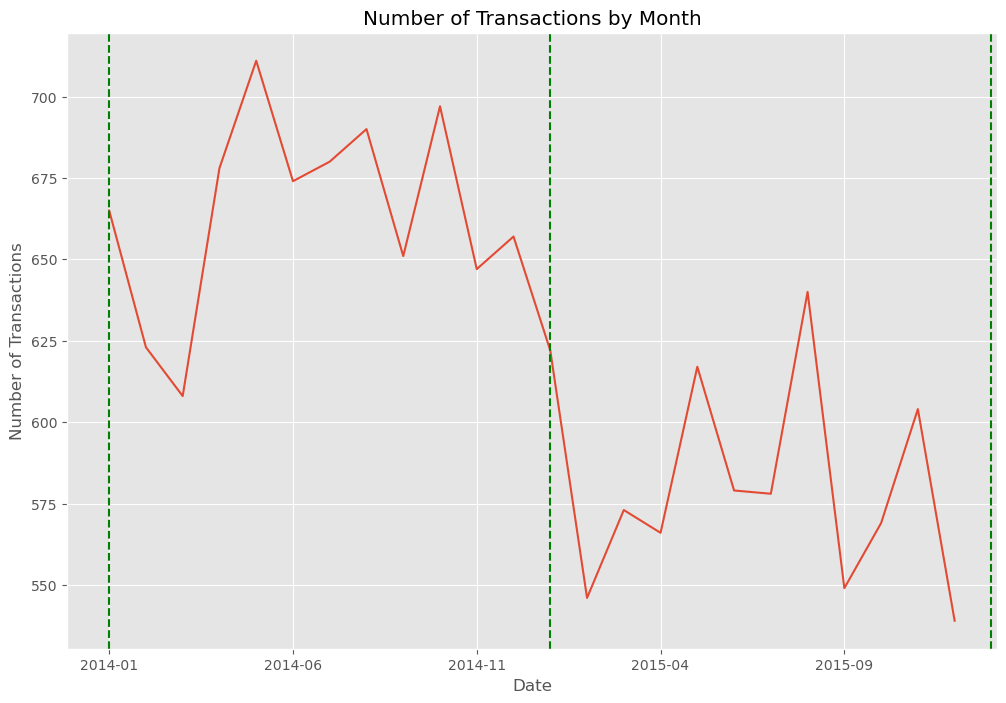

In [546]:
# plot the # of transactions by month
plt.figure(figsize=(12,8))
df.groupby(df['Date'].str[:7])['TransactionID'].nunique().plot(kind='line')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Month')
# vertical lines to indicate the start of each year
plt.axvline(x=0, color='g', linestyle='--')
plt.axvline(x=12, color='g', linestyle='--')
plt.axvline(x=24, color='g', linestyle='--')
plt.show()

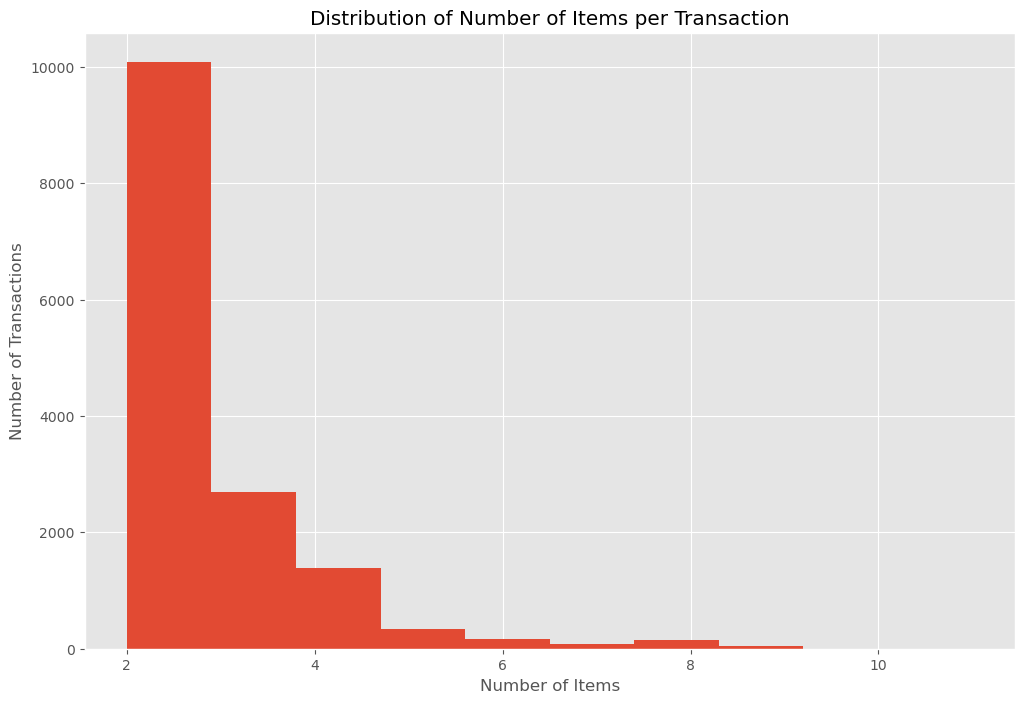

In [547]:
# plot the distribution of the number of items per transaction
plt.figure(figsize=(12,8))
df.groupby('TransactionID')['itemDescription'].count().hist(bins=10)
plt.xlabel('Number of Items')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Number of Items per Transaction')

plt.show()

In [548]:
# distribution of number of items per transaction
df['TransactionID'].value_counts().describe()


count    14963.000000
mean         2.590724
std          1.117469
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: TransactionID, dtype: float64

### Apriori 

The Apriori algorithm is commonly used for market basket analysis to find frequent itemsets and association rules in transactional data. The algorithm works by identifying the most frequent individual items in the dataset and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the dataset.

The Apriori algorithm requires the data to be in a one-hot encoded

In [549]:
df.head()

,Member_number,Date,itemDescription,TransactionID
0,1808,2015-07-21,tropical fruit,1808-2015-07-21
1,2552,2015-01-05,whole milk,2552-2015-01-05
2,2300,2015-09-19,pip fruit,2300-2015-09-19
3,1187,2015-12-12,other vegetables,1187-2015-12-12
4,3037,2015-02-01,whole milk,3037-2015-02-01


In [550]:
# Group by TransactionID and create a list of items
transactions = df.groupby('TransactionID')['itemDescription'].apply(list).reset_index(name='Items')

# Use TransactionEncoder
te = TransactionEncoder()
te_array = te.fit_transform(transactions['Items'])

# Convert to DataFrame
basket = pd.DataFrame(te_array, columns=te.columns_)

# Add TransactionID back to the DataFrame
basket['TransactionID'] = transactions['TransactionID']

In [551]:
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,TransactionID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1000-2014-06-24
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

Now we can apply the Apriori algorithm to find frequent itemsets. You'll need to specify a minimum support value, which is the minimum fraction of transactions in which an itemset appears.

In [554]:
# Drop the TransactionID column before applying Apriori
basket_sets = basket.drop('TransactionID', axis=1)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

In [555]:
frequent_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(soda, whole milk)"
122,0.005814,"(yogurt, soda)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [532]:
# # most frequent item(set)s
# frequent_itemsets.iloc[np.argsort(frequent_itemsets['support'])[-5:], :]

,support,itemsets
49,0.085879,(yogurt)
41,0.097106,(soda)
36,0.110005,(rolls/buns)
32,0.122101,(other vegetables)
48,0.157923,(whole milk)


In [556]:
# Check if there are itemsets with more than one item
multi_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
print(multi_itemsets)


      support                             itemsets
89   0.007151           (whole milk, bottled beer)
90   0.005480    (bottled water, other vegetables)
91   0.007151          (bottled water, whole milk)
92   0.006015            (whole milk, canned beer)
93   0.007151           (citrus fruit, whole milk)
94   0.005280          (whole milk, domestic eggs)
95   0.005146      (other vegetables, frankfurter)
96   0.005280            (whole milk, frankfurter)
97   0.005614             (newspapers, whole milk)
98   0.010559       (rolls/buns, other vegetables)
99   0.005280  (root vegetables, other vegetables)
100  0.006015          (other vegetables, sausage)
101  0.009691             (soda, other vegetables)
102  0.006282   (tropical fruit, other vegetables)
103  0.014837       (whole milk, other vegetables)
104  0.008087           (yogurt, other vegetables)
105  0.006483                 (whole milk, pastry)
106  0.006616              (pip fruit, whole milk)
107  0.005012                  

generate the association rules from these frequent itemsets. You'll need to specify the metric ('lift', 'confidence', etc.) and its minimum threshold.

Metrics:
- Support: The proportion of transactions in the dataset that contain the itemset. 
- Confidence: Given two items A and B, confidence measures the likelihood that item B is purchased when item A is purchased. 
- Lift: Lift measures how much more likely item B is purchased when A is purchased, compared to when B is purchased randomly. A Lift value greater than 1 indicates that items A and B are more likely to be bought together. 
- Leverage: leverage measures the difference between the observed frequency of A and B occurring together and the frequency that would be expected if A and B were statistically independent


In [558]:
# Generate association rules with a minimum lift of 1 (adjust as needed)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.001)

# rules = rules[(rules['lift'] >= .01) & (rules['confidence'] >= 0.005)]

In [560]:
# round all values to 2 decimal places
rules = rules.round(2)
rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.16,0.05,0.01,0.05,1.00,-0.0,1.00,-0.00
1,(bottled beer),(whole milk),0.05,0.16,0.01,0.16,1.00,-0.0,1.00,-0.00
2,(bottled water),(other vegetables),0.06,0.12,0.01,0.09,0.74,-0.0,0.97,-0.27
3,(other vegetables),(bottled water),0.12,0.06,0.01,0.04,0.74,-0.0,0.98,-0.29
4,(bottled water),(whole milk),0.06,0.16,0.01,0.12,0.75,-0.0,0.95,-0.27
...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(tropical fruit),0.16,0.07,0.01,0.05,0.77,-0.0,0.98,-0.26
70,(tropical fruit),(yogurt),0.07,0.09,0.01,0.08,0.90,-0.0,0.99,-0.11
71,(yogurt),(tropical fruit),0.09,0.07,0.01,0.06,0.90,-0.0,0.99,-0.11
72,(yogurt),(whole milk),0.09,0.16,0.01,0.13,0.82,-0.0,0.97,-0.19


- antecedents and consequents: These columns show the itemsets that are antecedents (if you buy this) and consequents (then you are likely to buy this).

- antecedent support and consequent support: These columns show the support for the antecedent and the consequent items. Support is the proportion of transactions in the dataset that contain the itemset.

- support: This is the support for the rule (both antecedent and consequent appearing together in a transaction).

- confidence: This is the likelihood that the consequent is bought when the antecedent is bought. It's calculated as support / antecedent support.

- lift: This tells you how much more likely the consequent is bought when the antecedent is bought, compared to being bought randomly. A lift value greater than 1 indicates that the antecedent and consequent are more likely to be bought together than separately.

- leverage: This measures the difference between the observed frequency of the antecedent and consequent appearing together and what would be expected if they were independent. A value of 0 indicates independence.

- conviction: A high conviction value means that the consequent is highly dependent on the antecedent. For instance, a conviction value of 1.5 means that the rule would be incorrect 50% more often if the association between the antecedent and the consequent was purely random chance.

- zhangs_metric: This is another metric to evaluate the rule, it ranges from -1 to 1, and a higher absolute value suggests a stronger association.

### Visualize Rules

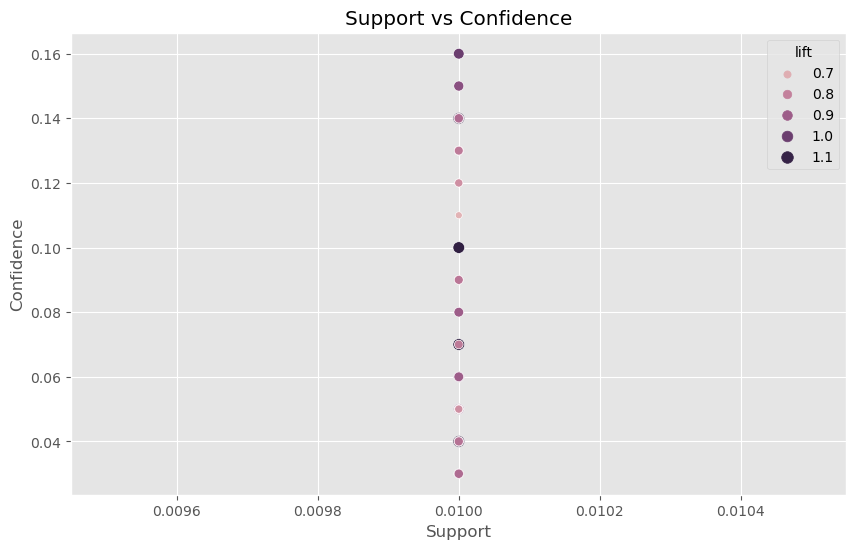

In [562]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")
plt.show()

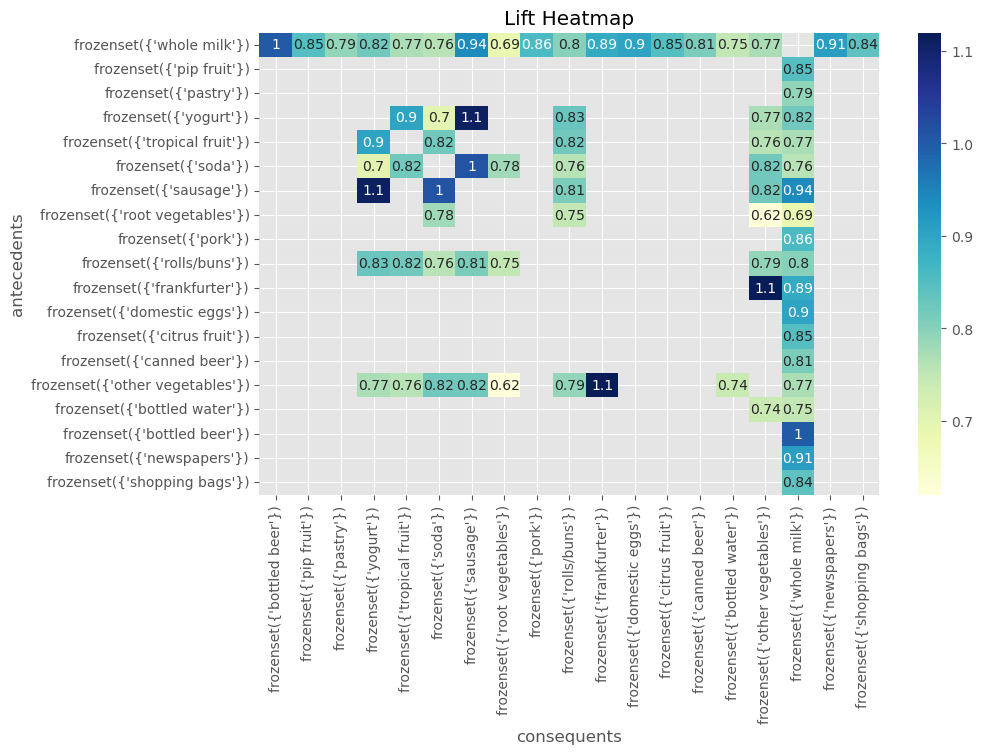

In [563]:

# Create a pivot table for lift values
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Lift Heatmap")
plt.show()


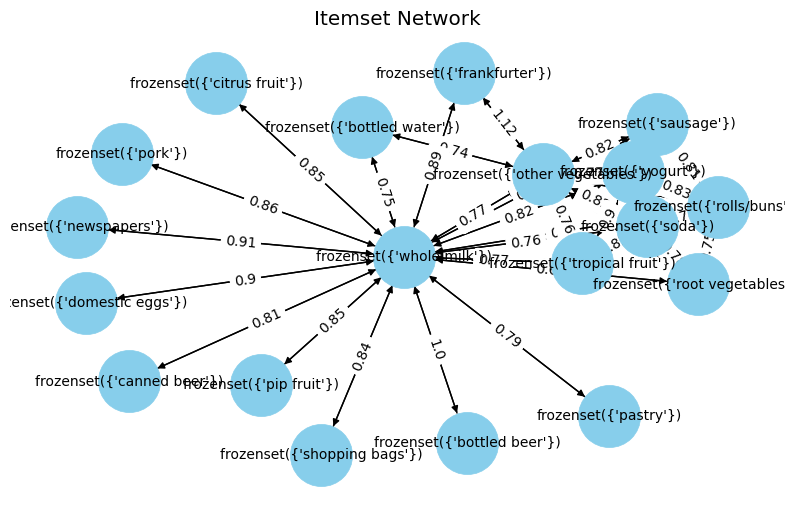

In [566]:
import matplotlib.pyplot as plt

# Create a new directed graph from edges
G = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents', edge_attr=True, create_using=nx.DiGraph())

# Create a new matplotlib axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the graph on the axes object
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, ax=ax)
labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
ax.set_title("Itemset Network")

# Show the plot
plt.show()

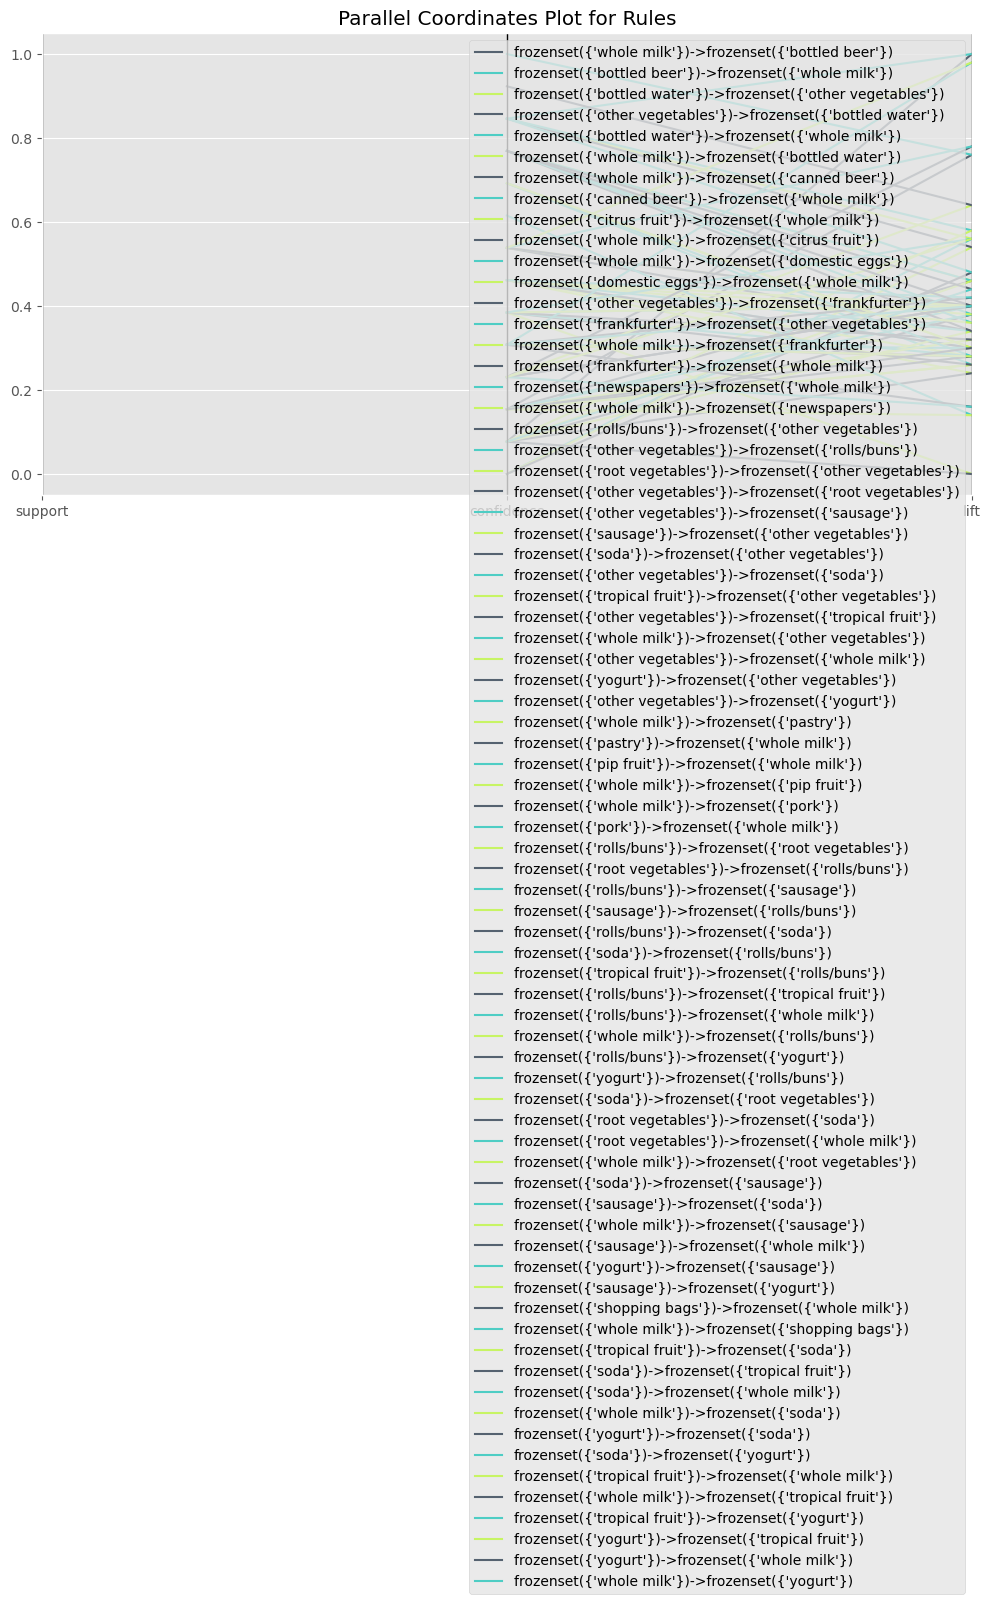

In [565]:
from pandas.plotting import parallel_coordinates

# Select numerical features to plot
features = ['support', 'confidence', 'lift']

# Normalize the data for better visualization
rules_normalized = rules.copy()
rules_normalized[features] = (rules[features] - rules[features].min()) / (rules[features].max() - rules[features].min())

# Add a 'rule' column to concatenate antecedent and consequent itemsets
rules_normalized['rule'] = rules['antecedents'].astype(str) + '->' + rules['consequents'].astype(str)

plt.figure(figsize=(12, 6))
parallel_coordinates(rules_normalized, 'rule', cols=features, color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Parallel Coordinates Plot for Rules')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [538]:
# Getting the most popular association rules? 

# top_patterns? 

# test to see which items to recommend, after seeing only 1 item from the customer (1 antecedent)

# Time-based Analysis: Since your data spans multiple years, you might consider running the Apriori algorithm on a subset of the data based on time periods (e.g., monthly or yearly) to see if shopping patterns have changed over time.

# Customer Segmentation: You could also segment your customers based on certain characteristics or behaviors and run the Apriori algorithm for each segment to find more targeted association rules.

# Item Categorization: If your items can be categorized (e.g., dairy, fruits, beverages), you might consider running the algorithm on these categories instead of individual items for a higher-level view of associations.